# Image_Proccess

## Basic functions

In [1]:
# -*- coding: utf-8 -*-

import time
import sys
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def get_run_name(project_name, item_name, acc=None):
    date_str = time.strftime("%Y%m%d", time.localtime())
    time_str = time.strftime("%Y%m%d_%H%M%S", time.localtime())
    run_name = project_name + '-' + item_name + '-' + time_str
    if acc != None:
        acc_str = '{0:0>4}'.format(int(acc*10000))
        run_name = run_name + '-' + acc_str
    print('run_name: ' + run_name)
    return run_name

def get_html_folder(is_preview=False):
    html_folder = os.path.join(os.getcwd(), 'html')
    if not os.path.exists(html_folder):
        os.mkdir(html_folder)
    if is_preview:
        print(html_folder)
    return html_folder

def get_input_folder(is_preview=False):
    input_folder = os.path.join(os.getcwd(), 'input')
    if not os.path.exists(input_folder):
        os.mkdir(input_folder)
    if is_preview:
        print(input_folder)
    return input_folder

def get_input_processed_folder(is_preview=False):
    input_processed_folder = os.path.join(os.getcwd(), 'input', 'processed')
    if not os.path.exists(input_processed_folder):
        os.mkdir(input_processed_folder)
    if is_preview:
        print(input_processed_folder)
    return input_processed_folder

def get_log_folder(is_preview=False):
    log_folder = os.path.join(os.getcwd(), 'log')
    if not os.path.exists(log_folder):
        os.mkdir(log_folder)
    if is_preview:
        print(log_folder)
    return log_folder

def get_model_folder(is_preview=False):
    model_folder = os.path.join(os.getcwd(), 'model')
    if not os.path.exists(model_folder):
        os.mkdir(model_folder)
    if is_preview:
        print(model_folder)
    return model_folder

def get_output_folder(is_preview=False):
    output_folder = os.path.join(os.getcwd(), 'output')
    if not os.path.exists(output_folder):
        os.mkdir(output_folder)
    if is_preview:
        print(output_folder)
    return output_folder

def describe(arr):
    print(arr.shape, arr.min(), arr.max(), sys.getsizeof(arr))

def show_data_images(rows, fig_column, id_data, y_data, *args):
    columns = len(args)
    figs, axes = plt.subplots(rows, columns, figsize=(rows, fig_column*columns))
    print(axes.shape)  
    for i, ax in enumerate(axes):
        y_data_str = ''
        if type(y_data) != type(None):
            y_data_str =  '_' + str(y_data[i])
        ax[0].set_title(id_data[i] + y_data_str)
        for j, arg in enumerate(args):
            ax[j].imshow(arg[i])

def load_sample_submission(is_preview=True):
    sample_submission_file = os.path.join(get_input_folder(), 'sample_submission.csv')
    sample_submission = pd.read_csv(sample_submission_file)
    print(sample_submission.shape)
    if is_preview:
        print(sample_submission.head(2))
    return sample_submission

def load_id(is_preview=True):
    id_data_file = os.path.join(get_input_processed_folder(), 'id_data.npy')
    id_test_file = os.path.join(get_input_processed_folder(), 'id_test.npy')
    id_data = np.load(id_data_file)
    id_test = np.load(id_test_file)
    if is_preview:
        describe(id_data)
        describe(id_test)
    return id_data, id_test

def load_y_data(is_preview=True):
    y_data_file = os.path.join(get_input_processed_folder(), 'y_data.npy')
    y_data = np.load(y_data_file)
    if is_preview:
        describe(y_data)
    return y_data

def load_inc_angle_data(is_preview=True):
    inc_angle_data_file = os.path.join(get_input_processed_folder(), 'inc_angle_data.npy')
    inc_angle_test_file = os.path.join(get_input_processed_folder(), 'inc_angle_test.npy')
    inc_angle_data = np.load(inc_angle_data_file)
    inc_angle_test = np.load(inc_angle_test_file)
    if is_preview:
        describe(inc_angle_data)
        describe(inc_angle_test)
    return inc_angle_data, inc_angle_test

def load_band_data(target_size=75, is_preview=True):
    if target_size == 75:
        target_size_str = ''
    else:
        target_size_str = str(target_size)
    band1_data_file = os.path.join(get_input_processed_folder(), 'band1_data%s.npy' % target_size_str)
    band2_data_file = os.path.join(get_input_processed_folder(), 'band2_data%s.npy' % target_size_str)
    band1_test_file = os.path.join(get_input_processed_folder(), 'band1_test%s.npy' % target_size_str)
    band2_test_file = os.path.join(get_input_processed_folder(), 'band2_test%s.npy' % target_size_str)

    band1_data = np.load(band1_data_file)
    band2_data = np.load(band2_data_file)
    band1_test = np.load(band1_test_file)
    band2_test = np.load(band2_test_file)
    if is_preview:
        describe(band1_data)
        describe(band2_data)
        describe(band1_test)
        describe(band2_test)
    return band1_data, band2_data, band1_test, band2_test

def load_data(target_size=75, is_preview=True):
    if target_size == 75:
        target_size_str = ''
    else:
        target_size_str = str(target_size)
    
    band1_data, band2_data, band1_test, band2_test = load_band_data(target_size=target_size, is_preview=False)
    band_max_data = np.maximum(band1_data, band2_data)
    band_max_test = np.maximum(band1_test, band2_test)

    x_data = np.concatenate(
        [band1_data[:, :, :, np.newaxis],
        band2_data[:, :, :, np.newaxis],
        band_max_data[:, :, :, np.newaxis]], axis=-1)

    x_test = np.concatenate(
        [band1_test[:, :, :, np.newaxis],
        band2_test[:, :, :, np.newaxis],
        band_max_test[:, :, :, np.newaxis]], axis=-1)

    if is_preview:
#         describe(band_max_data)
#         describe(band_max_test)

        describe(x_data)
        describe(x_test)
    
    return x_data, x_test


In [2]:
t0 = time.time()
run_name = get_run_name('SC_Iceberg_Classifier', 'Image_Proccess')
html_folder = get_html_folder(True)
input_folder = get_input_folder(True)
input_processed_folder = get_input_processed_folder(True)
log_folder = get_log_folder(True)
model_folder = get_model_folder(True)
output_folder = get_output_folder(True)

run_name: SC_Iceberg_Classifier-Image_Proccess-20180112_233026
D:\Kaggle\statoil-iceberg-classifier-challenge\html
D:\Kaggle\statoil-iceberg-classifier-challenge\input
D:\Kaggle\statoil-iceberg-classifier-challenge\input\processed
D:\Kaggle\statoil-iceberg-classifier-challenge\log
D:\Kaggle\statoil-iceberg-classifier-challenge\model
D:\Kaggle\statoil-iceberg-classifier-challenge\output


### Import pkgs

In [3]:
import os
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import skimage
%matplotlib inline

### Unzip files

We need unzip file manually with 7z installed.

### Load data

In [4]:
sample_submission = load_sample_submission()

(8424, 2)
         id  is_iceberg
0  5941774d         0.5
1  4023181e         0.5


In [5]:
%%time
#Load data
data_file = os.path.join(input_folder, 'train.json')
test_file = os.path.join(input_folder, 'test.json')
pd_data = pd.read_json(data_file)
pd_test = pd.read_json(test_file)
print(pd_data.shape)
print(pd_test.shape)
print(pd_data.columns)
print(pd_test.columns)

(1604, 5)
(8424, 4)
Index(['band_1', 'band_2', 'id', 'inc_angle', 'is_iceberg'], dtype='object')
Index(['band_1', 'band_2', 'id', 'inc_angle'], dtype='object')
Wall time: 32.7 s


In [6]:
id_data = pd_data['id'].as_matrix()
id_test = pd_test['id'].as_matrix()
describe(id_data)
describe(id_test)

id_data_file = os.path.join(input_processed_folder, 'id_data.npy')
id_test_file = os.path.join(input_processed_folder, 'id_test.npy')
np.save(id_data_file, id_data)
np.save(id_test_file, id_test)

(1604,) 000d71b1 fffe76e4 96
(8424,) 000c65d7 fff77564 96


In [7]:
y_data = pd_data['is_iceberg']
describe(y_data)

is_iceberg_file = os.path.join(input_processed_folder, 'y_data.npy')
np.save(is_iceberg_file, y_data)

(1604,) 0 1 12936


In [8]:
inc_angle_data = pd_data['inc_angle'].replace('na', 0).astype(float).fillna(0.0)
inc_angle_test = pd_test['inc_angle'].replace('na', 0).astype(float).fillna(0.0)
angle_min = min(inc_angle_data.min(), inc_angle_test.min())
angle_max = max(inc_angle_data.max(), inc_angle_test.max())
inc_angle_data = (inc_angle_data - angle_min)/(angle_max - angle_min)
inc_angle_test = (inc_angle_test - angle_min)/(angle_max - angle_min)

describe(inc_angle_data)
describe(inc_angle_test)

inc_angle_data_file = os.path.join(get_input_processed_folder(), 'inc_angle_data.npy')
inc_angle_test_file = os.path.join(get_input_processed_folder(), 'inc_angle_test.npy')
np.save(inc_angle_data_file, inc_angle_data)
np.save(inc_angle_test_file, inc_angle_test)

(1604,) 0.0 0.906748545018 12936
(8424,) 0.455580077133 1.0 67496


In [9]:
#get numpy arrays for train/test data
band1 = pd_data['band_1'].values
im1 = np.zeros((len(band1),len(band1[0])))
for i, band in enumerate(band1):
    im1[i,:]=np.asarray(band)
    
band2 = pd_data['band_2'].values
im2 = np.zeros((len(band2),len(band2[0])))
for i, band in enumerate(band2):
    im2[i,:]=np.asarray(band)


#get numpy array for test data
band1_t = pd_test['band_1'].values
im1_test = np.zeros((len(band1_t),len(band1_t[0])))
for i, band in enumerate(band1_t):
    im1_test[i,:]=np.asarray(band)
    
band2_t = pd_test['band_2'].values
im2_test = np.zeros((len(band2_t),len(band2_t[0])))
for i, band in enumerate(band2_t):
    im2_test[i,:]=np.asarray(band)

In [10]:
band1_data = im1.reshape(-1, 75,75)
band2_data = im2.reshape(-1, 75,75)

band1_test = im1_test.reshape(-1, 75,75)
band2_test = im2_test.reshape(-1, 75,75)

describe(band1_data)
describe(band2_data)
describe(band1_test)
describe(band2_test)

band1_data_file = os.path.join(input_processed_folder, 'band1_data.npy')
band2_data_file = os.path.join(input_processed_folder, 'band2_data.npy')
band1_test_file = os.path.join(input_processed_folder, 'band1_test.npy')
band2_test_file = os.path.join(input_processed_folder, 'band2_test.npy')

np.save(band1_data_file, band1_data)
np.save(band2_data_file, band2_data)
np.save(band1_test_file, band1_test)
np.save(band2_test_file, band2_test)

(1604, 75, 75) -45.594448 34.574917 128
(1604, 75, 75) -45.655499 20.154249 128
(8424, 75, 75) -45.6805458069 37.090523 128
(8424, 75, 75) -49.0835 37.0905227661 128


(5, 2)
(5, 2)


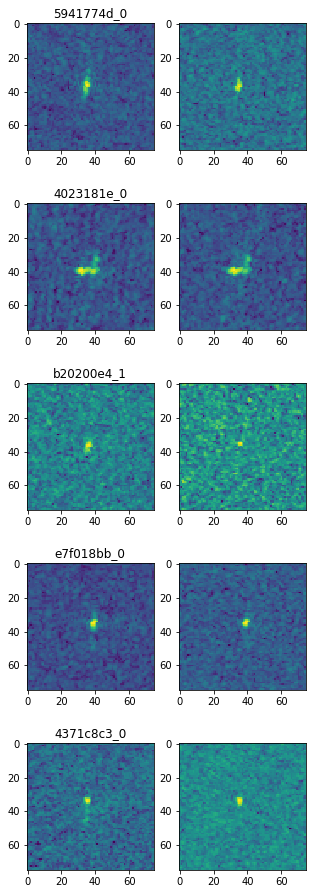

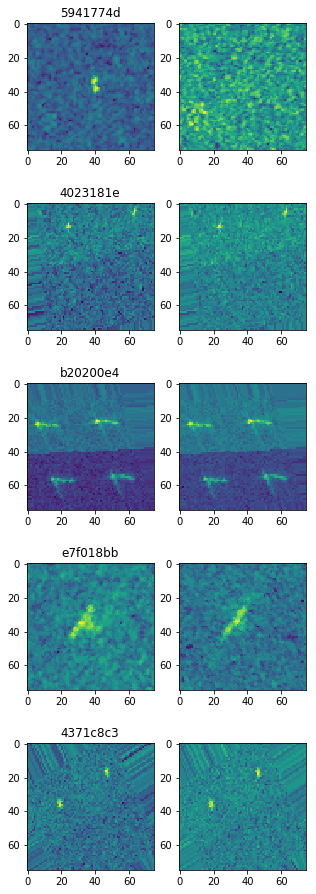

In [11]:
show_data_images(5, 8, id_test, y_data, band1_data, band2_data)
show_data_images(5, 8, id_test, None, band1_test, band2_test)

### Load data

In [12]:
%%time
id_data, id_test = load_id()
y_data = load_y_data()
inc_angle_data, inc_angle_test = load_inc_angle_data()
band1_data, band2_data, band1_test, band2_test = load_band_data()
x_data, x_test = load_data()

(1604,) 000d71b1 fffe76e4 12928
(8424,) 000c65d7 fff77564 67488
(1604,) 0 1 12928
(1604,) 0.0 0.906748545018 12928
(8424,) 0.455580077133 1.0 67488
(1604, 75, 75) -45.594448 34.574917 72180128
(1604, 75, 75) -45.655499 20.154249 72180128
(8424, 75, 75) -45.6805458069 37.090523 379080128
(8424, 75, 75) -49.0835 37.0905227661 379080128
(1604, 75, 75, 3) -45.655499 34.574917 216540144
(8424, 75, 75, 3) -49.0835 37.090523 1137240144
Wall time: 20.2 s


In [13]:
t1 = time.time()
print('time cost: %.2f s' % (t1-t0))
print('Done!')

time cost: 75.88 s
Done!


In [14]:
print(run_name)

SC_Iceberg_Classifier-Image_Proccess-20180112_233026
